In [1]:
import pandas as pd
import numpy as np

# Modelling
from sklearn.model_selection import train_test_split # Splitting data into train and test
from sklearn.linear_model import LogisticRegression # Logisitic regression
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import model_selection, metrics   # Model selection and evaluation
from sklearn.model_selection import GridSearchCV   #For grid search parameter tuning
from helpers_python import modelfit # Helpers for evaluating the model

# Plotting
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# Reading in processed data from R into Python

In [2]:
# Connecting to R
import rpy2.robjects as robjects 
from rpy2.robjects import pandas2ri

# Read in data from R
pandas2ri.activate()

readRDS = robjects.r['readRDS']
df = readRDS('data/dogs_proc.RDS')
df = pandas2ri.ri2py(df)
df = pd.concat([df, pd.get_dummies(df['borough'])], axis=1)
df = df.drop('borough', axis=1)

In [3]:
df.head(10)

,days_since_birth,is_name_missing,is_pit_bull,is_male,is_born_jan,is_secondary_color_missing,is_third_color_missing,spayed_or_neutered_bool,Bronx,Brooklyn,Manhattan,Queens,Staten Island
1,4772.0,0,0,1,1,0,1,1,0,0,1,0,0
2,4590.0,0,0,0,0,1,1,1,0,0,1,0,0
3,4467.0,0,0,0,0,0,1,1,0,0,1,0,0
4,4041.0,0,0,0,1,0,1,1,0,0,1,0,0
5,3768.0,0,0,0,0,0,0,1,0,0,1,0,0
6,3676.0,0,0,1,1,0,0,1,1,0,0,0,0
7,3525.0,0,0,0,0,1,1,1,0,0,1,0,0
8,3037.0,0,0,1,0,0,0,0,0,0,1,0,0
9,2914.0,0,0,1,0,1,1,0,0,0,0,1,0
10,2215.0,0,0,1,1,0,1,1,1,0,0,0,0


# Split data into training and test set

In [4]:
# Prepare training & test set
response = 'spayed_or_neutered_bool'
X = df.drop(response, axis=1)
y = df[response]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Model & Evaluation


Model Report
AUC Score (Train): 0.691114
CV Score : Mean - 0.6906898 | Std - 0.005662115 | Min - 0.6842542 | Max - 0.6972533


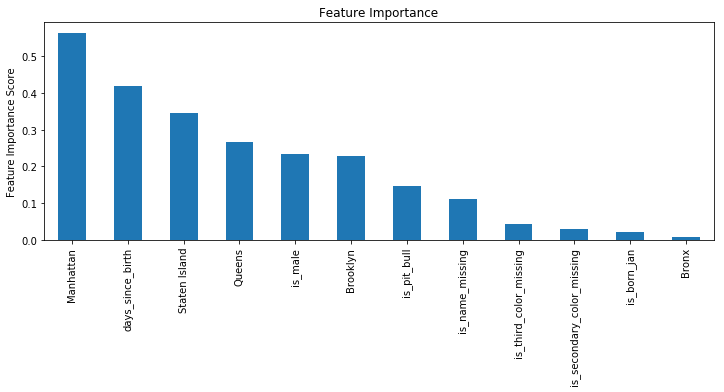

In [5]:
lr_ridge = LogisticRegression(penalty='l2', fit_intercept=False, random_state=101)
modelfit(lr_ridge, X_train, y_train, model_name='lr_ridge', logistic=True, 
         parameters=dict(C=np.array([0.5, 0.75, 1, 1.25])))


Model Report
AUC Score (Train): 0.691106
CV Score : Mean - 0.6906858 | Std - 0.005658519 | Min - 0.6842639 | Max - 0.6972482


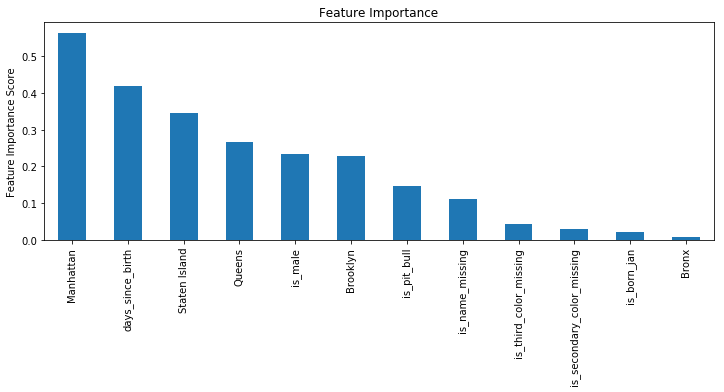

In [6]:
lr_lasso = LogisticRegression(penalty='l1', fit_intercept=False, random_state=101)
modelfit(lr_lasso, X_train, y_train,  model_name='lr_lasso', logistic=True, 
                        parameters=dict(C=np.array([0.5, 0.75, 1, 1.25])))


Model Report
AUC Score (Train): 0.715385
CV Score : Mean - 0.7141188 | Std - 0.004819807 | Min - 0.7088484 | Max - 0.720651


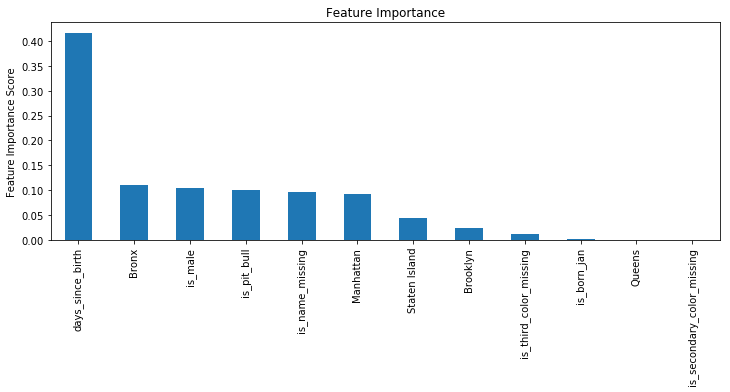

In [7]:
# GBM Model
gbm = GradientBoostingClassifier(random_state=10)
modelfit(gbm, X_train, y_train, model_name='gbm',
                   parameters=dict(n_estimators=np.array([20, 30]),
                                   max_depth=np.array([2, 3]),
                                   min_samples_split=np.array([2, 3])))


Model Report
AUC Score (Train): 0.715303
CV Score : Mean - 0.7127178 | Std - 0.004893874 | Min - 0.7072749 | Max - 0.7194325


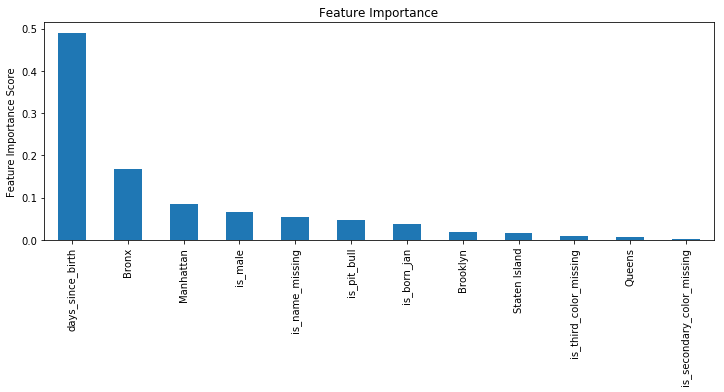

In [8]:
# Random Forest
rf = RandomForestClassifier(random_state=10)
modelfit(rf, X_train, y_train, model_name='rf',
                  parameters=dict(n_estimators=np.array([5, 10, 20, 30]),
                                  max_depth=np.array([2, 3, 4, 5]),
                                  min_samples_split=np.array([2, 3]),
                                  min_samples_leaf=np.array([2, 3])))

# Next Steps
1. Select a model and then verify the evalutation metric(s) on the test set are inline with the training set. 
To be sure there is no overfitting
2. Re-train selected model on all the data (train + test set)
3. If objective is to classify, select a threshold for the score outputted from the model. 